In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('C:\\Users\\mastercare\\Downloads\\strokedata.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# Preprocessing

In [7]:
# Here column id is no use for analysis, so i dropped it. 
df.drop(labels=['id'],inplace=True,axis=1)

In [8]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [9]:
# In gender category had a 'other' entry
df[df['gender']== 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [10]:
# Only 1 row is assigned to 'other', so i decided to drop it.
other=df[df['gender']== 'Other'].index
df.drop(other,inplace=True)

In [11]:
df.age.nunique()

104

In [12]:
# Age column has 104 unique values, so decided to categories the ages and create a new column

def age (age):
    if age >80 :
        return '80+'
    elif age> 65:
        return '65-80'
    elif age> 50:
        return '50-65'
    elif age> 35:
        return '35-50'
    elif age > 18:
        return '18-35'
    else:
        return '0-18'

In [13]:
df['age_group']=df['age'].apply(age)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65-80
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,50-65
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,65-80
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,35-50
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,65-80
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,65-80
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,80+
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,18-35
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,50-65


In [14]:
# avg_gucose_level coloum has wide range of values, so it is divided into 3 categories and new column is created

# Here average glucose level is considered as bedtime value
def diabetics(avg_glucose_level):
    if avg_glucose_level <=140:
        return 'Normal'
    elif avg_glucose_level <=180:
        return 'PreDiabetic'
    else:
        return 'Diabetic'
    

In [15]:
df['diabetics']=df['avg_glucose_level'].apply(diabetics)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,diabetics
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65-80,Diabetic
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,50-65,Diabetic
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,65-80,Normal
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,35-50,PreDiabetic
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,65-80,PreDiabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,65-80,Normal
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,80+,Normal
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,18-35,Normal
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,50-65,PreDiabetic


In [16]:
df.bmi.isna().sum()

201

In [17]:
df['bmi'].mean()

28.894559902200502

In [18]:
# bmi column has 201 null values so fill it with mean of that column

df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [19]:
# Categorise bmi values and add a new coloum for analysis 

def obesity(bmi):
    if bmi <18.5:
        return 'Underweight'
    elif bmi<= 24.9:
        return 'Ideal'
    elif bmi<= 29.9:
        return 'Overweight'
    else:
        return 'Obese'
    

In [20]:
df['obesity']=df['bmi'].apply(obesity)

In [21]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,diabetics,obesity
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1,65-80,Diabetic,Obese
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1,50-65,Diabetic,Overweight
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1,65-80,Normal,Obese
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1,35-50,PreDiabetic,Obese
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1,65-80,PreDiabetic,Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0,65-80,Normal,Overweight
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0,80+,Normal,Obese
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0,18-35,Normal,Obese
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0,50-65,PreDiabetic,Overweight


# Analysis : 

# Which age group is more vulnerable to stroke?



In [22]:
agegrp1=pd.pivot_table(df,index='age_group',values='stroke',aggfunc='sum')
agegrp1=agegrp1.sort_values(by='age_group')
agegrp1


,stroke
age_group,
0-18,2
18-35,1
35-50,20
50-65,70
65-80,133
80+,23


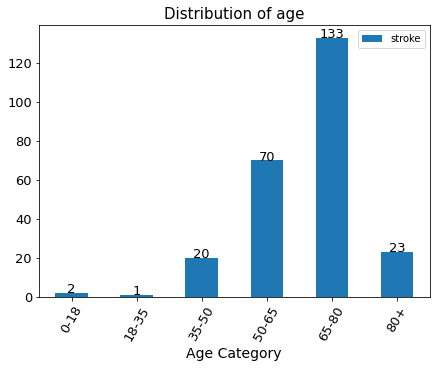

In [23]:
agegrp1.plot(kind='bar',rot=60,fontsize=13,figsize=(7,5))
plt.title('Distribution of age',fontsize=15)
plt.xlabel('Age Category',fontsize=14)
plt.text(0,2,2, ha='center',fontsize=13)
plt.text(1,1,1, ha='center',fontsize=13)
plt.text(2,20,20, ha='center',fontsize=13)
plt.text(3,70,70, ha='center',fontsize=13)
plt.text(4,133,133, ha='center',fontsize=13)
plt.text(5,23,23, ha='center',fontsize=13)
plt.show()

According to the analysis, The risk of stroke is more vulnerable after the age of 65 eventhough the risk peaks after 50s.

# Females or Males had more chance of stroke?

In [24]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [25]:
table=df.groupby('gender')['stroke'].sum()
table

gender
Female    141
Male      108
Name: stroke, dtype: int64

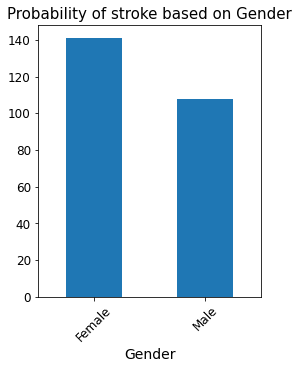

In [70]:
table.plot(kind='bar',figsize=(4,5),fontsize=12,rot=45)
plt.title('Probability of stroke based on Gender',fontsize=15)
plt.xlabel('Gender',fontsize=14)
plt.show()

# Females belong to which age group had more chance of stroke?



In [27]:
females=df.loc[df['gender']=='Female']
females.reset_index(drop=True,inplace=True)
females

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,diabetics,obesity
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1,50-65,Diabetic,Overweight
1,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1,35-50,PreDiabetic,Obese
2,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1,65-80,PreDiabetic,Ideal
3,Female,69.0,0,0,No,Private,Urban,94.39,22.80000,never smoked,1,65-80,Normal,Ideal
4,Female,59.0,0,0,Yes,Private,Rural,76.15,28.89456,Unknown,1,50-65,Normal,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,Female,13.0,0,0,No,children,Rural,103.08,18.60000,Unknown,0,0-18,Normal,Ideal
2990,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0,65-80,Normal,Overweight
2991,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0,80+,Normal,Obese
2992,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0,18-35,Normal,Obese


In [28]:
fem=pd.pivot_table(females,index='age_group',values='stroke',aggfunc='sum')
fem

,stroke
age_group,
0-18,2
18-35,1
35-50,14
50-65,33
65-80,79
80+,12


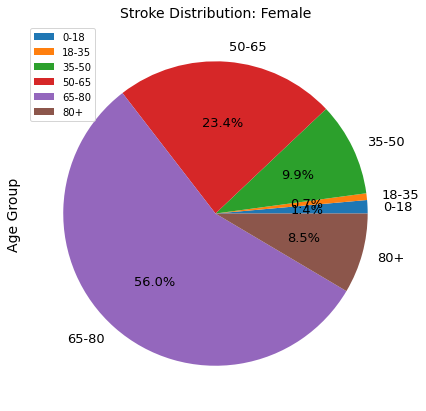

In [30]:
fem.plot(figsize=(7,7),kind='pie',subplots=True,autopct='%1.1f%%',fontsize=13)
plt.title('Stroke Distribution: Female',fontsize=14)
plt.ylabel('Age Group',fontsize=14)
plt.show()

# Males belong to which age group had more chance of stroke?





In [31]:
males=df.loc[df['gender']=='Male']
males.reset_index(drop=True,inplace=True)
males

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,diabetics,obesity
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1,65-80,Diabetic,Obese
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1,65-80,Normal,Obese
2,Male,81.0,0,0,Yes,Private,Urban,186.21,29.00000,formerly smoked,1,80+,Diabetic,Overweight
3,Male,74.0,1,1,Yes,Private,Rural,70.09,27.40000,never smoked,1,65-80,Normal,Overweight
4,Male,78.0,0,1,Yes,Private,Urban,219.84,28.89456,Unknown,1,65-80,Diabetic,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.80000,Unknown,0,65-80,Normal,Obese
2111,Male,9.0,0,0,No,children,Urban,71.88,17.50000,Unknown,0,0-18,Normal,Underweight
2112,Male,40.0,0,0,Yes,Private,Rural,83.94,28.89456,smokes,0,35-50,Normal,Overweight
2113,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.30000,never smoked,0,80+,Normal,Overweight


In [32]:
male=males.groupby('age_group')['stroke'].sum()
male

age_group
0-18      0
18-35     0
35-50     6
50-65    37
65-80    54
80+      11
Name: stroke, dtype: int64

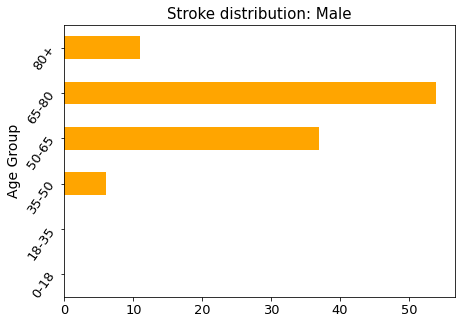

In [33]:
male.plot(figsize=(7,5),kind='barh',rot=55,fontsize=13,subplots=True,color='orange')
plt.title('Stroke distribution: Male',fontsize=15)
plt.ylabel('Age Group',fontsize=14)
plt.show()


Comparably risk of stroke in Females is more than the Male in this dataset.

Males had stroke from their 30s while Females had stroke irrespective of their age. 

# Is obesity a reason for stroke?



<AxesSubplot:xlabel='bmi', ylabel='Count'>

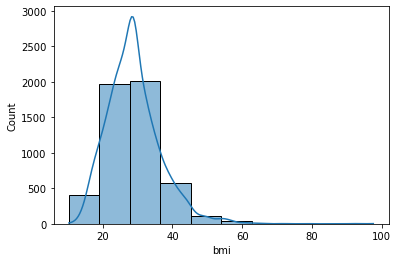

In [34]:
sns.histplot(data=df,x=df.bmi,kde=True,bins=10)

In [35]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,diabetics,obesity
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1,65-80,Diabetic,Obese
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1,50-65,Diabetic,Overweight
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1,65-80,Normal,Obese
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1,35-50,PreDiabetic,Obese
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1,65-80,PreDiabetic,Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0,65-80,Normal,Overweight
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0,80+,Normal,Obese
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0,18-35,Normal,Obese
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0,50-65,PreDiabetic,Overweight


In [36]:
df['obesity'].value_counts()

Obese          1920
Overweight     1610
Ideal          1242
Underweight     337
Name: obesity, dtype: int64

In [37]:
obs=df.groupby('obesity')['stroke'].sum()
obs


obesity
Ideal           35
Obese           98
Overweight     115
Underweight      1
Name: stroke, dtype: int64

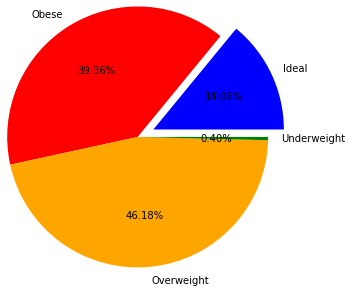

In [38]:
plt.pie(obs,labels=['Ideal','Obese','Overweight','Underweight'], autopct='%1.2f%%',radius=1.5,
        colors=['blue','red','orange','green'],explode=(.2,0,0,0))
plt.show()

From the pie chart 85.54% of the people had stroke as a result of Overweight or Obesity.

It can be concluded that increase in body weight increase the risk of stroke.

#  Is Diabetics a reason for stroke?






In [39]:
df.diabetics.unique()

array(['Diabetic', 'Normal', 'PreDiabetic'], dtype=object)

In [40]:
df['diabetics'].value_counts()

Normal         4289
Diabetic        583
PreDiabetic     237
Name: diabetics, dtype: int64

In [41]:
diab=pd.pivot_table(df,index='diabetics',values='stroke',aggfunc='sum')
diab


,stroke
diabetics,
Diabetic,79
Normal,156
PreDiabetic,14


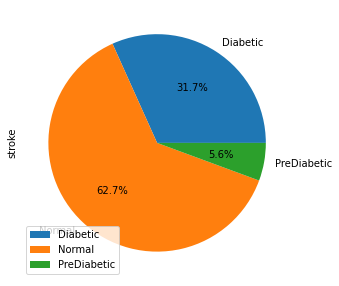

In [42]:
diab.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(5,5))
plt.legend(loc='best')
plt.show()

# Heartdisease / Hypertension, a reason for stroke?


In [43]:
pd.pivot_table(df,index=['heart_disease','obesity'],values='stroke',aggfunc='sum')

stroke
heart_disease obesity            
0             Ideal            31
              Obese            76
              Overweight       94
              Underweight       1
1             Ideal             4
              Obese            22
              Overweight       21

In [44]:
heart=df[df['heart_disease']==1]

In [45]:
h_dis=heart.groupby(['gender'])['stroke'].sum()
h_dis

gender
Female    19
Male      28
Name: stroke, dtype: int64

In [46]:
pd.pivot_table(df,index=['hypertension','obesity'],values='stroke',aggfunc='sum')

stroke
hypertension obesity            
0            Ideal            26
             Obese            68
             Overweight       88
             Underweight       1
1            Ideal             9
             Obese            30
             Overweight       27
             Underweight       0

In [47]:
hyper_t=df[df['hypertension']==1]

In [48]:
h_tens=hyper_t.groupby(['gender'])['stroke'].sum()
h_tens

gender
Female    39
Male      27
Name: stroke, dtype: int64

According to the analysis,

 Obese or overweighted people had hypertension and heart disease
 
 Males with heartdisease had stroke Compared to Females , Whereas Females with hypertension had more chances of   stroke.



# Is Smoking habit a reason for Stroke?





In [49]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

Unknown values in smoking_status column means the data is unavailable from the patients

In [50]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [51]:
smoke=df.groupby('smoking_status')['stroke'].sum()
smoke

smoking_status
Unknown            47
formerly smoked    70
never smoked       90
smokes             42
Name: stroke, dtype: int64

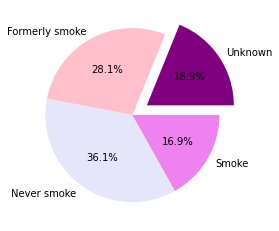

In [52]:
plt.pie(smoke,labels=['Unknown','Formerly smoke','Never smoke','Smoke'], autopct='%1.1f%%',
        colors=['purple','pink','lavender','violet'],explode=(.2,0,0,0))
plt.show()


#  People working in which sector had more risk of stroke?



In [53]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [54]:
work_sec=pd.pivot_table(df,values='stroke',index=['work_type','gender'],aggfunc='sum')
work_sec

stroke
work_type     gender        
Govt_job      Female      23
              Male        10
Never_worked  Female       0
              Male         0
Private       Female      76
              Male        73
Self-employed Female      40
              Male        25
children      Female       2
              Male         0

In [55]:
work=df[df['work_type']!= 'Never_worked']


In [56]:
work_sec1=pd.pivot_table(work,values='stroke',index=['work_type'],aggfunc='sum')
work_sec1

,stroke
work_type,
Govt_job,33
Private,149
Self-employed,65
children,2


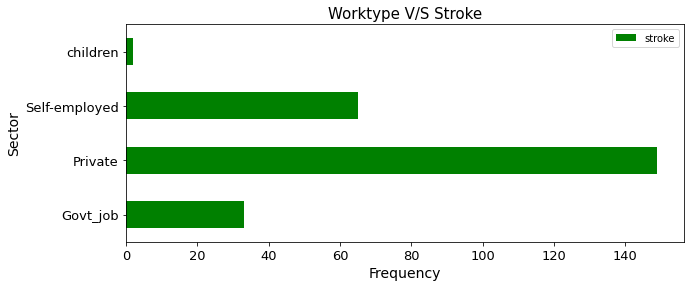

In [57]:
work_sec1.plot(kind='barh',figsize=(10,4),fontsize=13,color='green')
plt.title('Worktype V/S Stroke',fontsize=15)
plt.xlabel('Frequency',fontsize=14)
plt.ylabel('Sector',fontsize=14)
plt.show()

In [58]:
work_gen=pd.pivot_table(work,values='stroke',index=['work_type','gender'],aggfunc='sum')
work_gen

stroke
work_type     gender        
Govt_job      Female      23
              Male        10
Private       Female      76
              Male        73
Self-employed Female      40
              Male        25
children      Female       2
              Male         0

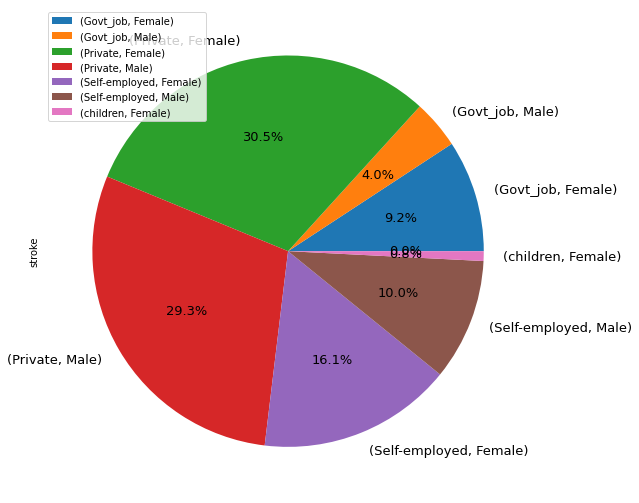

In [71]:
work_gen.plot(kind='pie',figsize=(9,9),fontsize=13,subplots=True,autopct='%1.1f%%')
plt.legend(loc='best')
plt.show()

In [60]:
work_res=pd.pivot_table(work,index=['Residence_type','work_type'],values='stroke',aggfunc='sum')
work_res

stroke
Residence_type work_type            
Rural          Govt_job           14
               Private            68
               Self-employed      31
               children            1
Urban          Govt_job           19
               Private            81
               Self-employed      34
               children            1

Marital status V/S stroke

In [66]:
mar_stat=pd.pivot_table(df,index=['gender','ever_married'],values='stroke',aggfunc=sum)
mar_stat

stroke
gender ever_married        
Female No                21
       Yes              120
Male   No                 8
       Yes              100

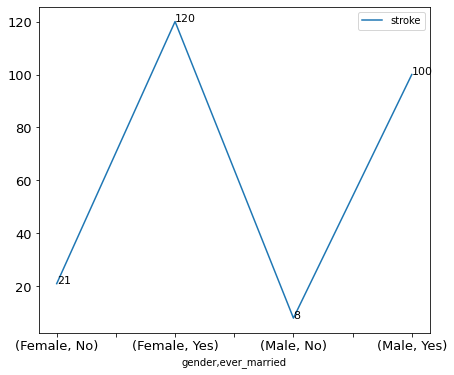

In [69]:
mar_stat.plot(figsize=(7,6),fontsize=13)
plt.text(0,21,21,fontsize=11)
plt.text(1,120,120,fontsize=11)
plt.text(2,8,8,fontsize=11)
plt.text(3,100,100,fontsize=11)
plt.show()

Datas with all vital reasons for stroke:

In [61]:
stroke_h=df[(df['heart_disease']==1)&(df['hypertension']==1)&(df['stroke']==1)]
stroke_h.reset_index(drop=True,inplace=True)
stroke_h


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,diabetics,obesity
0,Male,74.0,1,1,Yes,Private,Rural,70.09,27.40000,never smoked,1,65-80,Normal,Overweight
1,Female,82.0,1,1,No,Private,Rural,84.03,26.50000,formerly smoked,1,80+,Normal,Overweight
2,Male,71.0,1,1,No,Govt_job,Rural,216.94,30.90000,never smoked,1,65-80,Diabetic,Obese
3,Female,69.0,1,1,No,Self-employed,Urban,72.17,36.80000,never smoked,1,65-80,Normal,Obese
4,Female,79.0,1,1,No,Self-employed,Rural,60.94,28.89456,never smoked,1,65-80,Normal,Overweight
5,Male,61.0,1,1,Yes,Private,Urban,112.24,37.40000,smokes,1,50-65,Normal,Obese
6,Female,82.0,1,1,Yes,Govt_job,Urban,215.94,27.90000,formerly smoked,1,80+,Diabetic,Overweight
7,Male,68.0,1,1,Yes,Private,Rural,271.74,31.10000,smokes,1,65-80,Diabetic,Obese
8,Male,80.0,1,1,Yes,Private,Urban,175.29,31.50000,formerly smoked,1,65-80,PreDiabetic,Obese
9,Female,55.0,1,1,Yes,Private,Urban,210.40,40.00000,smokes,1,50-65,Diabetic,Obese


In [62]:
pd.pivot_table(stroke_h,index=['gender','age_group','diabetics','obesity','smoking_status'],
               values='stroke',aggfunc='sum')

stroke
gender age_group diabetics   obesity    smoking_status         
Female 50-65     Diabetic    Obese      smokes                1
       65-80     Diabetic    Obese      formerly smoked       1
                             Overweight smokes                1
                 Normal      Obese      never smoked          1
                             Overweight never smoked          1
       80+       Diabetic    Overweight formerly smoked       1
                 Normal      Overweight formerly smoked       1
Male   50-65     Normal      Obese      smokes                1
       65-80     Diabetic    Obese      never smoked          1
                                        smokes                1
                 Normal      Overweight never smoked          1
                 PreDiabetic Obese      formerly smoked       1
       80+       Diabetic    Overweight smokes                1

When we consider the case of patients who had stroke along with hypertension and heart disesase,
they all belong to the age group of 50 s and more. They all had smoking habit and belong
to over weight or obese category.


# Conclusions:


Being a Female increase the chance of stroke than Male.

Stroke can happen at any age, even-though the risk is more after the age of 35, 
grows eventually and reach its peak at 60s.

Obesity , Heart disease, Hypertension are major cause of stroke  .

People working in private sector irrespective of gender and residence type had stroke compared to others.

Lifestyle plays a major role in stroke , following a Healthy lifestyle reduce chances of stroke.
Also being unhealthy shootup the risk of stroke.
